In [1]:
# imports modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

##### Read CSV's

In [2]:
# Read All CSV's into Differnt Dataframes
data_boston = pd.read_csv("boston.csv")
data_area_stats = pd.read_csv("area_stats.csv")
data_history = pd.read_csv("history.csv")
data_targets = pd.read_csv("targets.csv")

In [3]:
data_boston.head()

,ID,AID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9234,885,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,5769,410,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2046,718,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,7915,410,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,5754,916,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data_area_stats.head()

,AID,INC,TRFK
0,916,Low,Medium
1,799,Medium,Low
2,674,Low,Low
3,542,Medium,Medium
4,457,Low,Low


In [5]:
data_history.head()

,ID,YSLS,LSP,AGE
0,9234,6.0,10.865544,37
1,5769,5.0,12.507983,17
2,2046,6.2,16.835212,18
3,7915,9.4,31.625241,38
4,5754,8.6,31.365915,30


In [6]:
data_targets.head()

,ID,MEDV
0,9234,24.0
1,5769,21.6
2,2046,34.7
3,7915,33.4
4,5754,36.2


##### Merge All dataframes into based on record ID and Area ID

In [7]:
data = data_boston.merge(data_history, on="ID", how = 'left').merge(data_area_stats, on="AID", how = 'left').merge(data_targets, on="ID", how = 'left')

In [8]:
data.head()

,ID,AID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE_x,DIS,...,TAX,PTRATIO,B,LSTAT,YSLS,LSP,AGE_y,INC,TRFK,MEDV
0,9234,885,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,...,296.0,15.3,396.90,4.98,6.0,10.865544,37.0,Medium,Medium,24.0
1,5769,410,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,...,242.0,17.8,396.90,9.14,5.0,12.507983,17.0,Medium,Low,21.6
2,2046,718,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,...,242.0,17.8,392.83,4.03,6.2,16.835212,18.0,Low,Low,34.7
3,7915,410,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,...,222.0,18.7,394.63,2.94,9.4,31.625241,38.0,Medium,Low,33.4
4,5754,916,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,...,222.0,18.7,396.90,5.33,8.6,31.365915,30.0,Low,Medium,36.2


AGE_y is from history dataframe and is the age of the building so i am naming it B_Age. The Age_x is proportion of owner-occupied units built prior to 1940 so I am naming it as P_Occupied

In [9]:
# Update Same Column Names
data = data.rename({'AGE_x': 'P_Occupied', 'AGE_y': 'B_Age'}, axis='columns')

In [10]:
data.head()

,ID,AID,CRIM,ZN,INDUS,CHAS,NOX,RM,P_Occupied,DIS,...,TAX,PTRATIO,B,LSTAT,YSLS,LSP,B_Age,INC,TRFK,MEDV
0,9234,885,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,...,296.0,15.3,396.90,4.98,6.0,10.865544,37.0,Medium,Medium,24.0
1,5769,410,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,...,242.0,17.8,396.90,9.14,5.0,12.507983,17.0,Medium,Low,21.6
2,2046,718,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,...,242.0,17.8,392.83,4.03,6.2,16.835212,18.0,Low,Low,34.7
3,7915,410,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,...,222.0,18.7,394.63,2.94,9.4,31.625241,38.0,Medium,Low,33.4
4,5754,916,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,...,222.0,18.7,396.90,5.33,8.6,31.365915,30.0,Low,Medium,36.2


In [11]:
data.shape

(506, 21)

In [12]:
data.columns

Index(['ID', 'AID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'P_Occupied',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'YSLS', 'LSP', 'B_Age',
       'INC', 'TRFK', 'MEDV'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          506 non-null    int64  
 1   AID         506 non-null    int64  
 2   CRIM        506 non-null    float64
 3   ZN          506 non-null    float64
 4   INDUS       506 non-null    float64
 5   CHAS        506 non-null    float64
 6   NOX         506 non-null    float64
 7   RM          506 non-null    float64
 8   P_Occupied  506 non-null    float64
 9   DIS         506 non-null    float64
 10  RAD         506 non-null    float64
 11  TAX         506 non-null    float64
 12  PTRATIO     506 non-null    float64
 13  B           506 non-null    float64
 14  LSTAT       506 non-null    float64
 15  YSLS        455 non-null    float64
 16  LSP         455 non-null    float64
 17  B_Age       455 non-null    float64
 18  INC         506 non-null    object 
 19  TRFK        506 non-null    o

In [14]:
data.isnull().sum()

ID             0
AID            0
CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
P_Occupied     0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
YSLS          51
LSP           51
B_Age         51
INC            0
TRFK           0
MEDV           0
dtype: int64

After merging the dataframes, there were null values found. The history dataframe did not had history for all records so some records got the null value

In [15]:
data = data.dropna()

##### Encode the string values into integer values

In [16]:
data.INC.unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [17]:
data.TRFK.unique()

array(['Medium', 'Low'], dtype=object)

In [18]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(data['INC']))}
print(class_mapping)

{'High': 0, 'Low': 1, 'Medium': 2}


In [19]:
class_mapping['High'] = 3

In [20]:
data['INC'] = data['INC'].map(class_mapping)
data['TRFK'] = data['TRFK'].map(class_mapping)

##### Delete the ID columns since we do not need it anymore

In [21]:
del data['ID']

In [22]:
data

,AID,CRIM,ZN,INDUS,CHAS,NOX,RM,P_Occupied,DIS,RAD,TAX,PTRATIO,B,LSTAT,YSLS,LSP,B_Age,INC,TRFK,MEDV
0,885,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,6.0,10.865544,37.0,2,2,24.0
1,410,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,5.0,12.507983,17.0,2,1,21.6
2,718,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,6.2,16.835212,18.0,1,1,34.7
3,410,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,9.4,31.625241,38.0,2,1,33.4
4,916,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,8.6,31.365915,30.0,1,2,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,542,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,2.5,3.577109,20.0,2,2,16.8
501,799,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,7.2,14.407897,27.0,2,1,22.4
502,368,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,3.5,8.786481,24.0,3,2,20.6
503,457,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,5.9,16.545973,35.0,1,1,23.9


### Visualization

Plotting the heatmap of correlation matric

<AxesSubplot:>

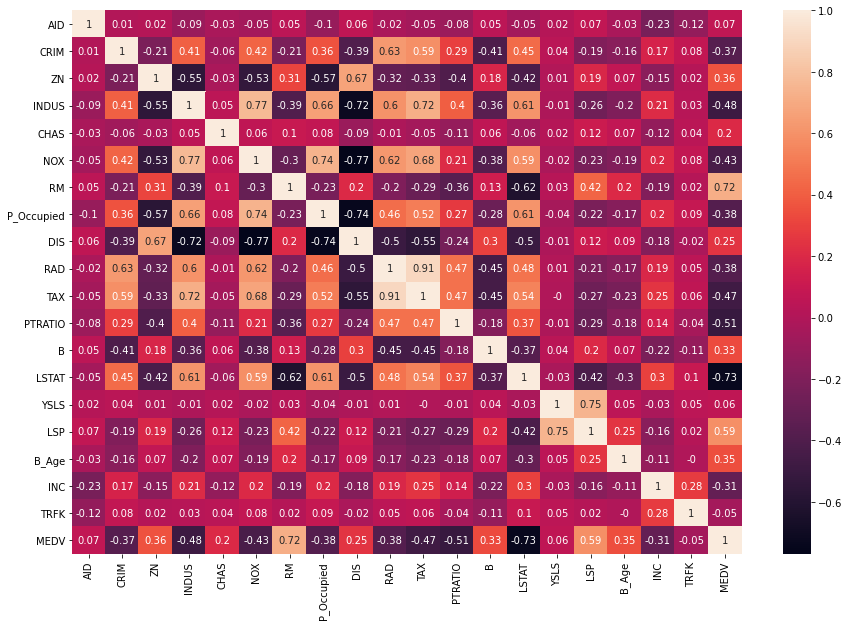

In [23]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(data=correlation_matrix, annot=True)


The heatmap shows that the target variable MEDV is highly correlated with LSTAT and RM Columns. Furthermore the RAD and TAX columns also show a very high correlation. So, while building the model one of them should be removed from the feature list. The NOX and DIS also show a high corelation to a degree that I think one of them can be removed from feature list.

##### Histogram

Histogram showing the distribution of raw data. The data is not symmetrical and many varaibles are skewed. There are also outliers visible in multiple varaibles specifically B and ZN show high percentage of outliers visually.

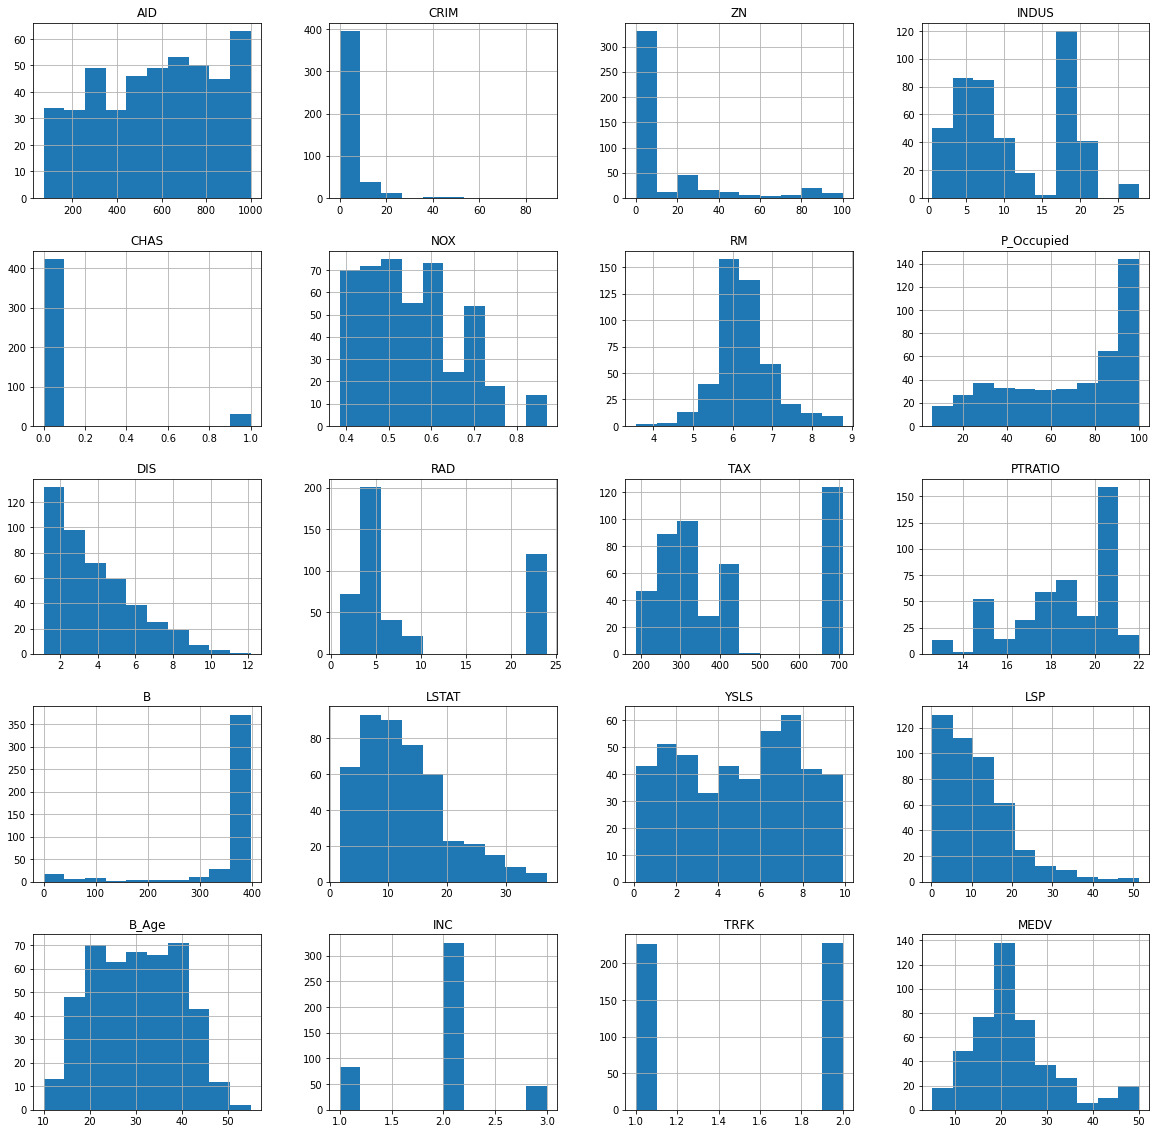

In [24]:
data.hist(figsize=(20,20))
plt.show()

##### Box Plot

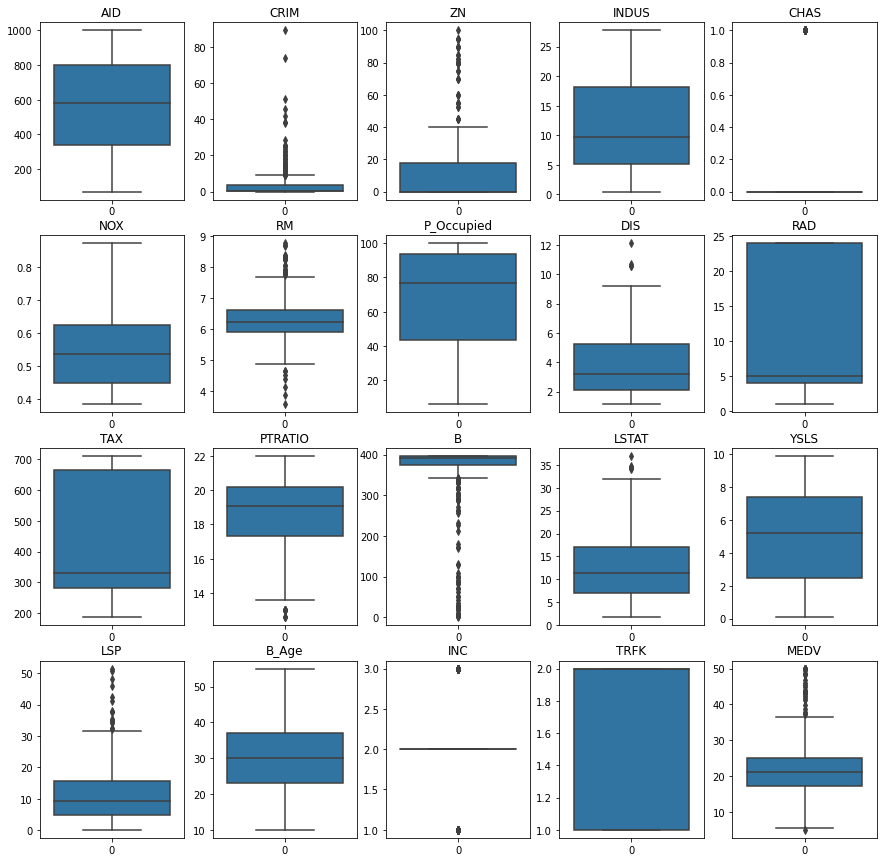

In [25]:
# Box Plots of the Columns
fig, axs = plt.subplots(4, 5,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[2])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[3])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[4])
    row += 1

##### Violin Plot

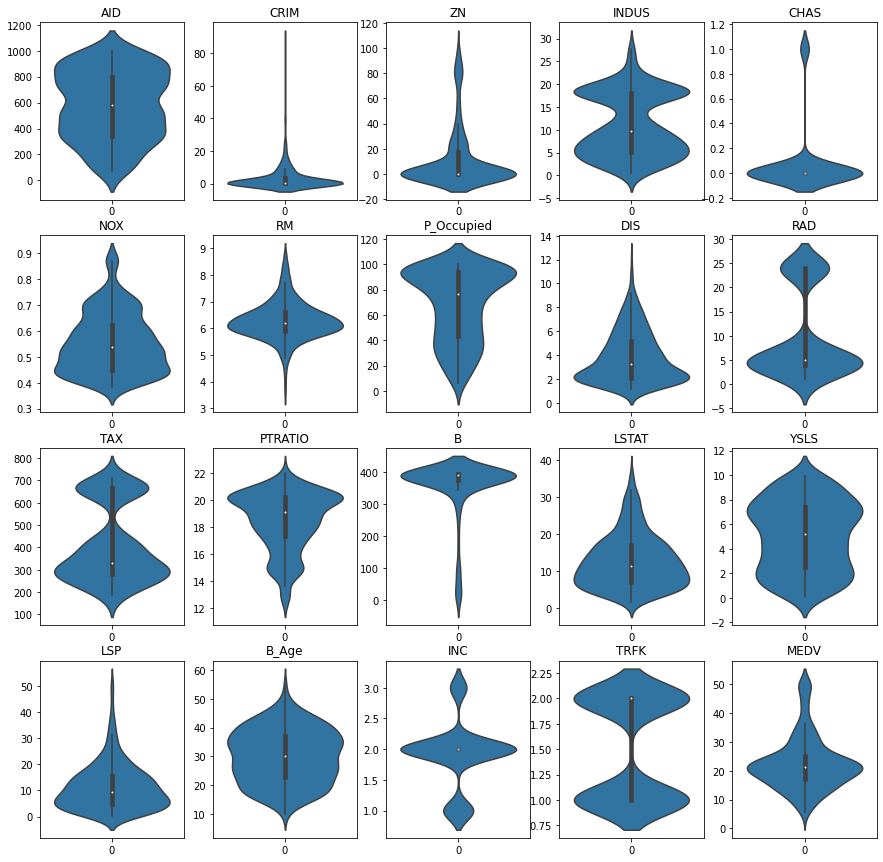

In [26]:
# Box Plots of the Columns
fig, axs = plt.subplots(4, 5,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[2])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[3])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[4])
    row += 1

The Box plot and Violin plot show that there are outliers in the data. Varaible CRIM, B and ZN show high percentage of outliers which can be removed for better predictions. But I am not removing the outliers rightnow. First I will train model with the outliers

##### Training and Target Varaible

In [27]:
X = data.loc[:, data.columns != 'MEDV']
y = data.loc[:, data.columns == 'MEDV']

In [28]:
X.shape

(455, 19)

In [29]:
y.shape

(455, 1)

##### Test and Teain Split

In [30]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
# Normalization of Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### Feature Selection by Sequestional Method

In [32]:
lr = LinearRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       
          k_features=(1,19),  
          forward=True,       
          floating=False, 
          scoring='r2',
          cv=5)

sfs = sfs.fit(X_train_std,y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_) 
print('Best subset (indices):', sfs.k_feature_idx_)                                               
print('Best subset (corresponding names):', sfs.k_feature_names_) 

Best accuracy score: 0.82
Best subset (indices): (1, 2, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
Best subset (corresponding names): ('1', '2', '5', '6', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17')


In [33]:
cols_index = list(map(int, sfs.k_feature_names_))
data.columns[cols_index]

Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
       'YSLS', 'LSP', 'B_Age', 'INC'],
      dtype='object')

In [34]:
len(sfs.k_feature_idx_)

14

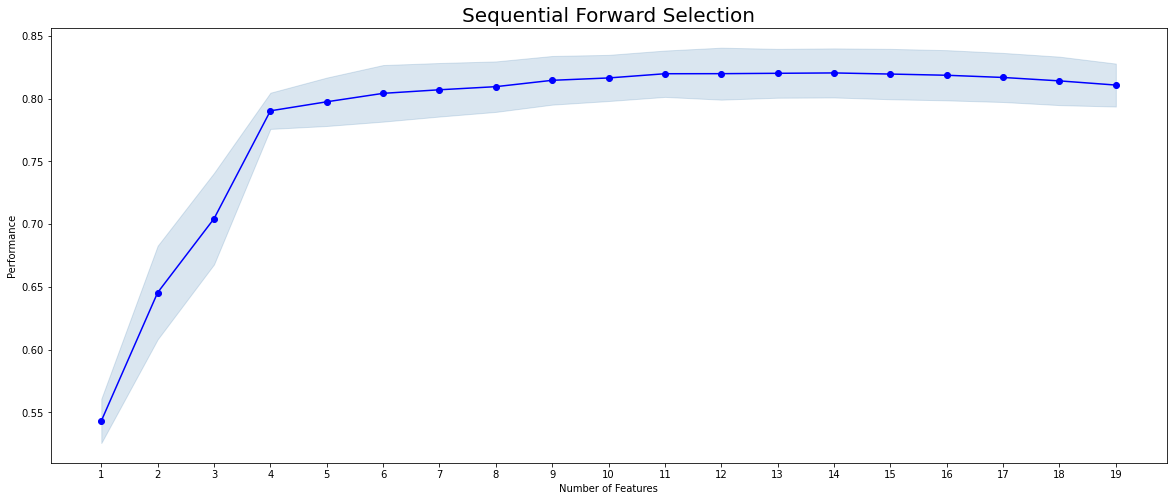

In [35]:
# Plot the score vs the feature index
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(20, 8))
plt.title('Sequential Forward Selection', fontsize=20)
plt.show()

Feature selection gives a subset of 14 features but looking at the sfs plot closely I observed that after 5 features the score is not being affected tha much. So, I decided to include less features in order to get a smart model at the expense of very little accuracy score

Now I will select the best 5 features and train my model on the basis of this feature set.

In [36]:
lr = LinearRegression()
# Create an SFS object
sfs = SFS(estimator=lr,      
          k_features=5, 
          forward=True,       
          floating=False, 
          scoring='r2', 
          cv=5)              

sfs = sfs.fit(X_train_std,y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)  
print('Best subset (indices):', sfs.k_feature_idx_) 
                                                    
print('Best subset (corresponding names):', sfs.k_feature_names_) 

Best accuracy score: 0.80
Best subset (indices): (6, 11, 13, 14, 15)
Best subset (corresponding names): ('6', '11', '13', '14', '15')


In [37]:
cols_index = list(map(int, sfs.k_feature_names_))
data.columns[cols_index]

Index(['RM', 'PTRATIO', 'LSTAT', 'YSLS', 'LSP'], dtype='object')

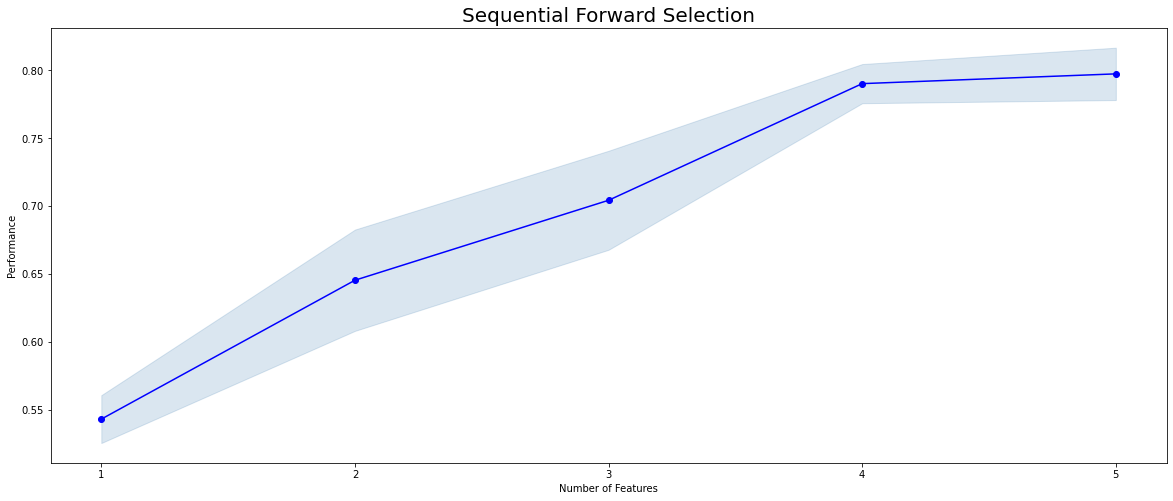

In [38]:
# Plot the score vs the feature index
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(20, 8))
plt.title('Sequential Forward Selection', fontsize=20)
plt.show()

In [39]:
# Transforming the data on the basis of SFS feature set
X_train_std_best = sfs.transform(X_train_std)
X_test_std_best = sfs.transform(X_test_std)

In [40]:
# Function for training models
# Include three regression algorithms i.e Linear regression, random forrest and SVR

def model_training(train_data,train_target,test_data,test_target):
    
    # Linear Regression
    Lr = LinearRegression(n_jobs=-1)
    Lr.fit(train_data,train_target)
    print ("For Linear Regression")
    print('Score for Train Data:' + str(Lr.score(train_data, train_target)))
    print('Score for Test Data:' + str(Lr.score(test_data, test_target)))
    accuracy_lr_train = cross_val_score(Lr, train_data, train_target, scoring='r2', cv=10)
    print('Crossvalidation Score Train Data(R2):' + str(accuracy_lr_train.mean()))
    accuracy_lr_test = cross_val_score(Lr, test_data, test_target, scoring='r2', cv=10)
    print('Crossvalidation Score Test Data (R2):' + str(accuracy_lr_test.mean()))
    error_lr = cross_val_score(Lr, train_data, train_target, scoring=make_scorer(mean_squared_error), cv=10)
    print('Mean Squared Error Train Data (MSE):' + str(error_lr.mean()))
    
    error_lr_test = cross_val_score(Lr, test_data, test_target, scoring=make_scorer(mean_squared_error), cv=10)
    print('Mean Squared Error Test Data (MSE):' + str(error_lr_test.mean()))
    
    # random forrest with grid search
    
    print ('\n\n')
    
    estimator = RandomForestRegressor()
    para_grids = {
                "n_estimators" : range(50,501,50),
                "criterion" : ['mse', 'mae']
            }
    grid = GridSearchCV(estimator, para_grids, scoring = 'r2',cv=5,n_jobs=-1)
    grid.fit(train_data, train_target.values.ravel())
    print ("For Random Forrest With Grid Search")
    print ("Grid Search Best Search:")
    print (grid.best_score_, grid.best_params_)
    
    classifier = grid.best_estimator_
    classifier.fit(train_data, train_target.values.ravel())
    
    print('Score for Train Data:' + str(classifier.score(train_data, train_target)))
    print('Score for Test Data:' + str(classifier.score(test_data, test_target)))
    
    accuracy_random_train = cross_val_score(classifier, train_data, train_target.values.ravel(), scoring='r2', cv=10)
    print('Crossvalidation Score Train Data(R2):' + str(accuracy_random_train.mean()))
    
    accuracy_random_test = cross_val_score(classifier, test_data, test_target.values.ravel(), scoring='r2', cv=10)
    print('Crossvalidation Score Test Data(R2):' + str(accuracy_random_test.mean()))
    
    mse_random = cross_val_score(classifier, train_data, train_target.values.ravel(), scoring=make_scorer(mean_squared_error), cv=10)
    print('Mean Squared Error Train Data (MSE):' + str(mse_random.mean()))
    
    mse_random_test = cross_val_score(classifier, test_data, test_target.values.ravel(), scoring=make_scorer(mean_squared_error), cv=10)
    print('Mean Squared Error Test Data (MSE):' + str(mse_random_test.mean()))
    
    
    # SVR with grid search
    
    print ('\n\n')
    
    estimator_svr = SVR()
    c_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    para_grids_svr = {
                "gamma" : ['scale','auto'],
                "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
                "C": c_range,
                "epsilon": np.arange(0.1,1,0.1)
            }
    grid_svr = GridSearchCV(estimator_svr, para_grids_svr, scoring = 'r2',cv=5,n_jobs=-1)

    grid_svr.fit(train_data, train_target.values.ravel())
    print ("For SVR With Grid Search")
    print ("Grid Search Best Search:")
    print (grid_svr.best_score_, grid_svr.best_params_)
    
    classifier_svr = grid_svr.best_estimator_
    classifier_svr.fit(train_data, train_target.values.ravel())
    
    print('Score for Train Data:' + str(classifier_svr.score(train_data, train_target)))
    print('Score for Test Data:' + str(classifier_svr.score(test_data, test_target)))

    accuracy_svr_train = cross_val_score(classifier_svr, train_data, train_target.values.ravel(), scoring='r2', cv=10)
    print('Crossvalidation Score Train Data(R2):' + str(accuracy_svr_train.mean()))

    accuracy_svr_test = cross_val_score(classifier_svr, test_data, test_target.values.ravel(), scoring='r2', cv=10)
    print('Crossvalidation Score Test Data(R2):' + str(accuracy_svr_test.mean()))

    mse_svr = cross_val_score(classifier_svr, train_data, train_target.values.ravel(), scoring=make_scorer(mean_squared_error), cv=10)
    print('Mean Squared Error Train Data (MSE):' + str(mse_svr.mean()))
    
    mse_svr_test = cross_val_score(classifier_svr, test_data, test_target.values.ravel(), scoring=make_scorer(mean_squared_error), cv=10)
    print('Mean Squared Error Test Data (MSE):' + str(mse_svr_test.mean()))

In [41]:
# Train Models
model_training(X_train_std_best,y_train,X_test_std_best,y_test)

For Linear Regression
Score for Train Data:0.8124855875046718
Score for Test Data:0.7548449600003341
Crossvalidation Score Train Data(R2):0.7973923767363191
Crossvalidation Score Test Data (R2):0.7253049581612313
Mean Squared Error Train Data (MSE):20.013297341157067
Mean Squared Error Test Data (MSE):10.231641975614924



For Random Forrest With Grid Search
Grid Search Best Search:
0.8228269625892874 {'criterion': 'mse', 'n_estimators': 450}
Score for Train Data:0.9769277309323996
Score for Test Data:0.7962907564863774
Crossvalidation Score Train Data(R2):0.8195883124251067
Crossvalidation Score Test Data(R2):0.6931472340313223
Mean Squared Error Train Data (MSE):17.26286255902034
Mean Squared Error Test Data (MSE):10.859503109998577



For SVR With Grid Search
Grid Search Best Search:
0.8632899486416671 {'C': 100.0, 'epsilon': 0.4, 'gamma': 'auto', 'kernel': 'rbf'}
Score for Train Data:0.9488231792777653
Score for Test Data:0.8413282744316624
Crossvalidation Score Train Data(R2):0.86

# Removing Outliers

Now Removing the Outliers

In [42]:
# copy Dataset
data2 = data.copy()

Three features showed outliers of high degree so I am removing outliers from CRIM ZN and B features. I am not removing every outlier. First I will remove the most extreme outliers
and then I will impute the rest with the median value

In [43]:
q_low = data2["CRIM"].quantile(0.01)
q_hi  = data2["CRIM"].quantile(0.95)

data2 = data2[(data2["CRIM"] < q_hi) & (data2["CRIM"] > q_low)]


q_low = data2["B"].quantile(0.1)
q_hi  = data2["B"].quantile(1)

data2 = data2[(data2["B"] < q_hi) & (data2["B"] > q_low)]

In [44]:
data2['CRIM'] = np.where(data2['CRIM'] > data2['CRIM'].quantile(0.90),
                                                 data2['CRIM'].quantile(0.50), data2['CRIM'])

data2['ZN'] = np.where(data2['ZN'] > data2['ZN'].quantile(0.95),
                                                 data2['ZN'].quantile(0.50), data2['ZN'])

data2['B'] = np.where(data2['B'] < data2['B'].quantile(0.15),
                                                 data2['B'].quantile(0.50), data2['B'])

# data2['LSP'] = np.where(data2['LSP'] > data2['LSP'].quantile(0.90),
#                                                  data2['LSP'].quantile(0.50), data2['LSP'])


In [45]:
data2.shape

(285, 20)

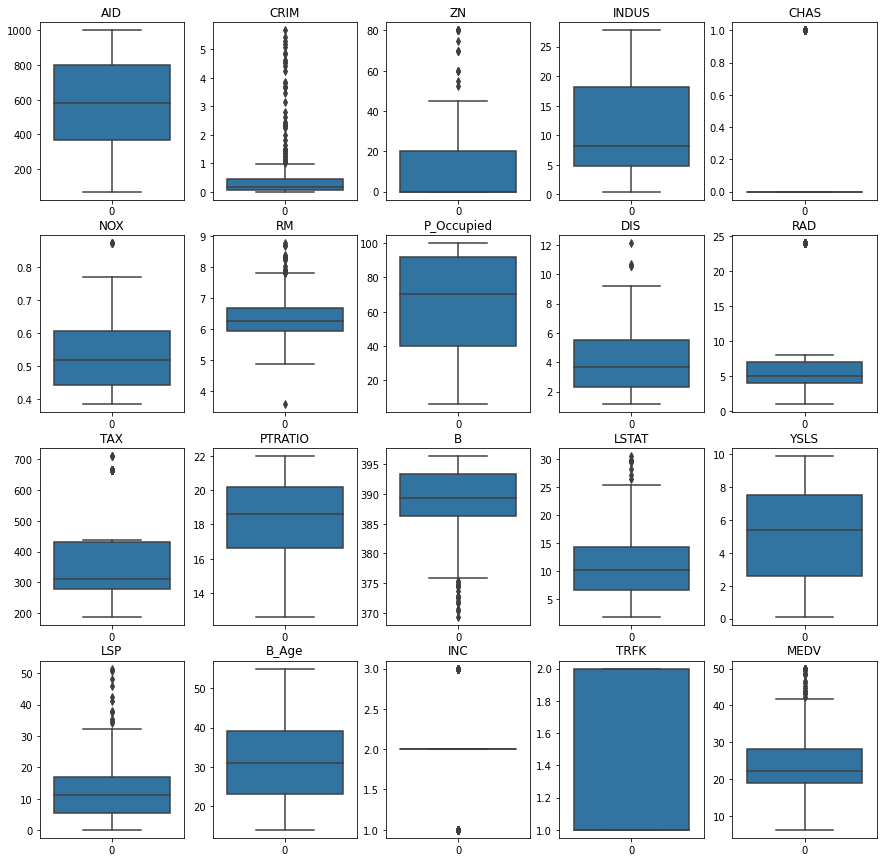

In [46]:
# Box Plots of the Columns
fig, axs = plt.subplots(4, 5,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data2.columns[col])
    sns.boxplot(data=data2[data2.columns[col]].values, ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data2.columns[col])
    sns.boxplot(data=data2[data2.columns[col]].values, ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data2.columns[col])
    sns.boxplot(data=data2[data2.columns[col]].values, ax=x[2])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data2.columns[col])
    sns.boxplot(data=data2[data2.columns[col]].values, ax=x[3])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data2.columns[col])
    sns.boxplot(data=data2[data2.columns[col]].values, ax=x[4])
    row += 1

The extreme outliers have been removed from the data. Now We will train the model based on the filtered data with the outliers removed

Best accuracy score: 0.78
Best subset (indices): (4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17)
Best subset (corresponding names): ('4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '15', '17')
Index(['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
       'YSLS', 'LSP', 'INC'],
      dtype='object')
12


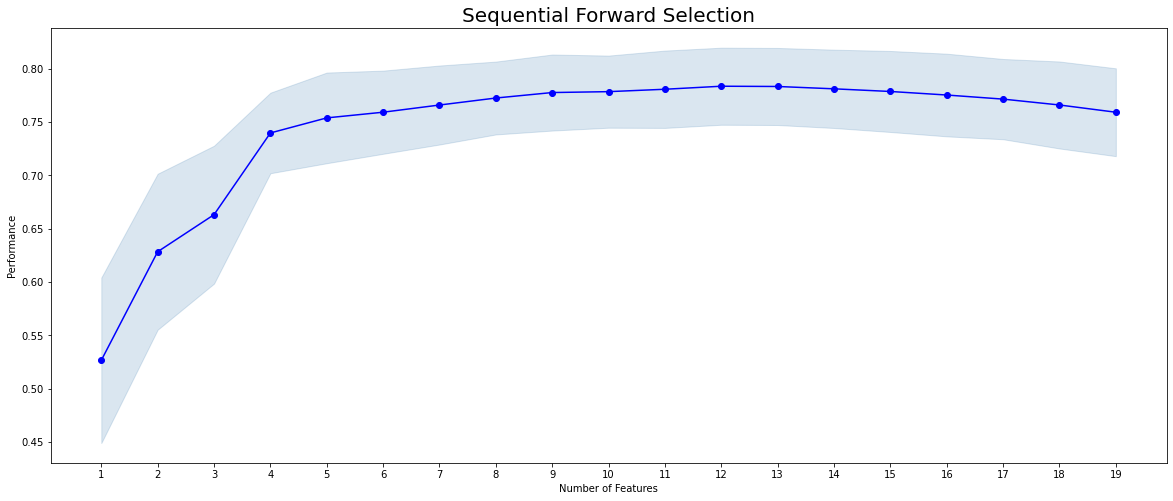

In [47]:
X_filtered = data2.loc[:, data.columns != 'MEDV']
y_filtered = data2.loc[:, data.columns == 'MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.20, random_state=42)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


lr = LinearRegression()


# Create an SFS object
sfs = SFS(estimator=lr,      
          k_features=(1,19),  
          forward=True,       
          floating=False, 
          scoring='r2', 
          cv=5)              

sfs = sfs.fit(X_train_std,y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)  
print('Best subset (indices):', sfs.k_feature_idx_)
                                                   
print('Best subset (corresponding names):', sfs.k_feature_names_) 
    
    
cols_index = list(map(int, sfs.k_feature_names_))
print(data2.columns[cols_index])


print(len(sfs.k_feature_idx_))


# Plot the score vs the feature index
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(20, 8))
plt.title('Sequential Forward Selection', fontsize=20)
plt.show()

Doing the sameprocedure here. Not selecting all features but only the features that are affecting score by high margin

Best accuracy score: 0.76
Best subset (indices): (6, 8, 11, 13, 14, 15)
Best subset (corresponding names): ('6', '8', '11', '13', '14', '15')
Index(['RM', 'DIS', 'PTRATIO', 'LSTAT', 'YSLS', 'LSP'], dtype='object')
6


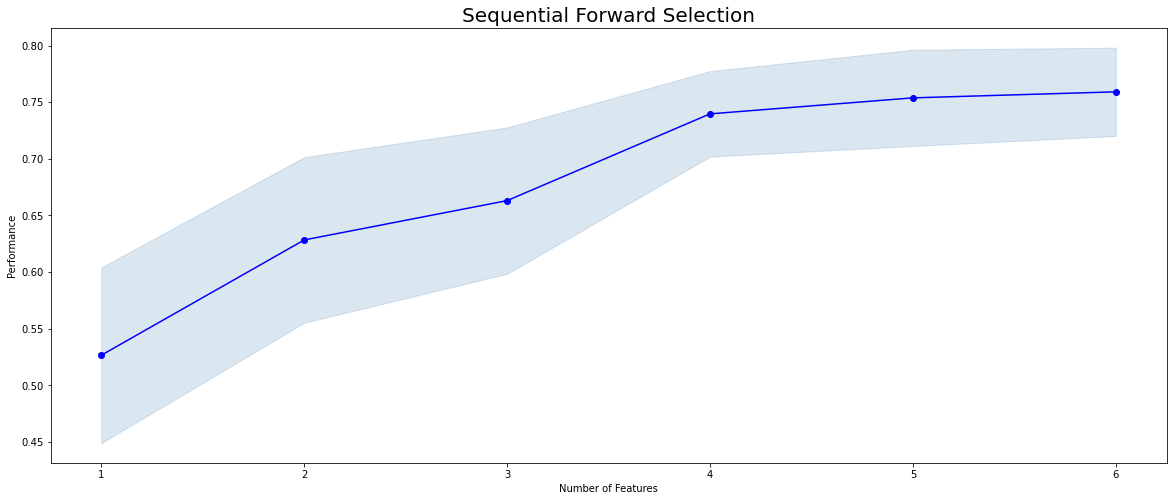

In [48]:
lr = LinearRegression()

#knn = KNeighborsClassifier(n_neighbors=8)
# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=6,  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          floating=False, 
          scoring='r2', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

sfs = sfs.fit(X_train_std,y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score
    
    
cols_index = list(map(int, sfs.k_feature_names_))
print(data2.columns[cols_index])


print(len(sfs.k_feature_idx_))

# Plot the score vs the feature index
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(20, 8))
plt.title('Sequential Forward Selection', fontsize=20)
plt.show()

In [49]:
X_train_std_best = sfs.transform(X_train_std)
X_test_std_best = sfs.transform(X_test_std)
print(X_test_std_best.shape)
model_training(X_train_std_best,y_train,X_test_std_best,y_test)

(57, 6)
For Linear Regression
Score for Train Data:0.7875571492685012
Score for Test Data:0.8899368934291542
Crossvalidation Score Train Data(R2):0.755739682785345
Crossvalidation Score Test Data (R2):0.8386441160127012
Mean Squared Error Train Data (MSE):20.583095471057074
Mean Squared Error Test Data (MSE):11.795085818438208



For Random Forrest With Grid Search
Grid Search Best Search:
0.8443421188822059 {'criterion': 'mse', 'n_estimators': 200}
Score for Train Data:0.9810507355980058
Score for Test Data:0.8746707886966091
Crossvalidation Score Train Data(R2):0.8211719006900635
Crossvalidation Score Test Data(R2):0.8002965786316608
Mean Squared Error Train Data (MSE):11.907656575296429
Mean Squared Error Test Data (MSE):11.666310562499968



For SVR With Grid Search
Grid Search Best Search:
0.8246550116701685 {'C': 100.0, 'epsilon': 0.7000000000000001, 'gamma': 'scale', 'kernel': 'rbf'}
Score for Train Data:0.9680389943396225
Score for Test Data:0.9325318576960445
Crossvalidation S

##### Analysis Conclusion

The best model I got for this problem was random forrest with estimators value as 200 and criterion mean sqaured error. This model gives a good R2 score of 0.80 and the least mean squared error of 11.66. This result was achieved by dealing with the outliers. I did not remove all the outliers instead I removed some rows which were extremely outlying observations. If I would have removed all the outliers then probably there would not be a good amout of data left for training the model. The rest of the outliers were susbtituted with the median value

Further analysis can be done on this problem with some other algorithms like PLS. We can also apply some other feature selection techniques or we can also do a PCA of the data.